In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer , add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars
from lowEBMs import update_plotstyle
update_plotstyle()
#from lowEBMs.Packages.Functions import asd

In [2]:
from lowEBMs.ForcingGenerator.VolcanicForcingGenerator1D import *
import matplotlib.pyplot as plt
import numpy as np
tprod=180
tloss=330
tmix_av=15*365/12
tres_av=17*365/12
lat=np.linspace(-85,85,18)
std_ET=18
mean_ET=45
std_EQ=18
mean_EQ=0
aod_nonlin=0.0784
aod_lin=0.0364
aod_RF=-20
data=Generator1D('lowEBMs/Forcings/Volcanic/Sigl2015.csv',',',2,0,1,2,4,1900,2000,1/365,5\
                 ,tprod,tloss,tmix_av,tres_av,lat,std_ET,mean_ET,std_EQ,mean_EQ,aod_lin,aod_nonlin,aod_RF)

(18, 36500)


<Figure size 864x360 with 0 Axes>

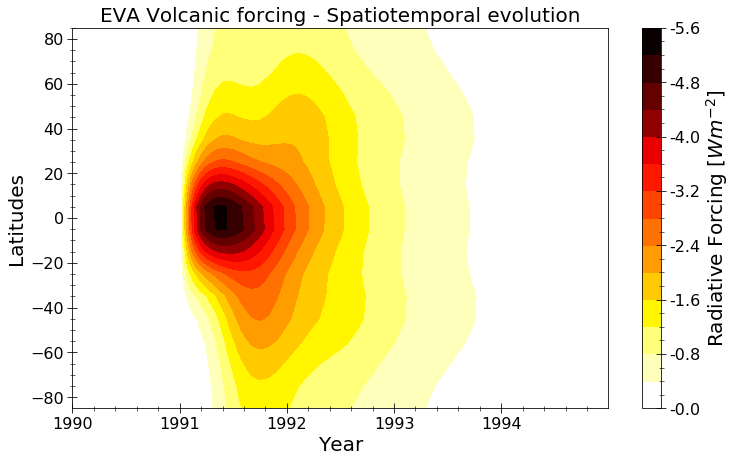

In [32]:
AOD_trans=np.transpose(data[2])
RF_trans=np.transpose(data[1])
#print(M1D)
fig=plt.figure(figsize=(12,5))
#plt.plot(lat,data[2])
#print(len(data[0]),len(lat),data[2][:])
print(np.shape(AOD_trans))
#plt.xlim(1991,1995)
fig, ax = plt.subplots(figsize=(12,7))
plot=plt.contourf(data[0][-365*10:-365*5],lat,AOD_trans[:,-365*10:-365*5],levels=14,cmap=plt.cm.get_cmap('hot_r',16))
cbar=fig.colorbar(plot)
cbar.set_label('Radiative Forcing [$Wm^{-2}$]')
labels = [item.get_text() for item in cbar.ax.get_yticklabels()]
for k in range(len(labels)):
    labels[k]=str(np.round(float(labels[k])*(-20),2))
#print(labels)

cbar.ax.set_yticklabels(labels)
#cbar.set_ticks([0,-2,-4])
#plt.clim(-6,0)
ax.set_title('EVA Volcanic forcing - Spatiotemporal evolution',fontsize=20)
ax.set_xlabel('Year')
ax.set_ylabel('Latitudes')
plt.savefig('Spatiotemporal_evolution_EVA.eps',format='eps',bbox_inches='tight')

In [129]:
outputdata=np.column_stack((data[0],data[1],data[2]))
#x=str([1,2,3])
#y=str([[1,1],[2,2],[3,3]])
np.savetxt('../../Forcings/Volcanic/EVA_800_2000_1D_10deg.txt',outputdata,delimiter=' , ',fmt='%2.4f')

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg, controlrun
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars,reset
from lowEBMs.Packages.Functions import plotmeanstd
#from plotstyle import main
import matplotlib
#main()
matplotlib.rcParams['lines.linewidth']=1.1
time_sec_year=60*60*24*365

In [210]:
configVolcCTRL=importer('Volcanic_CTRL.ini')
variable_importer(configVolcCTRL,False)#,accuracy_number=2000,accuracy=1e-4)
configVolcCTRL1,ParasCTRL=add_sellersparameters(configVolcCTRL,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
Volc_CTRL=rk4alg(model_equation,configVolcCTRL1['eqparam'],configVolcCTRL1['funccomp'])

Loading Configuration from: Volcanic_CTRL.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 49.81277847290039 seconds


In [205]:
Export=np.mean(Volc_CTRL[1][-36:],axis=0)
np.savetxt('Data/CTRL.txt',Export,delimiter=',')

In [207]:
CTRL=np.loadtxt('Data/CTRL.txt')
configVolc_EVA=importer('Volcanic_EVA_800_2000_1DForcing.ini')
variable_importer(configVolc_EVA,False)
CTRL_GMT=np.average(CTRL,weights=np.cos(Vars.Lat*np.pi/180))
configVolc_EVA,ParasVolc_EVA=add_sellersparameters(configVolc_EVA,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
#Elevation_weight=np.average(0.0065*np.array(ParasCTRL[1][1]),weights=np.cos(Vars.Lat*2*np.pi/360))
Vars.T,Vars.T_global=CTRL,CTRL_GMT
Volc_EVA=rk4alg(model_equation,configVolc_EVA['eqparam'],configVolc_EVA['funccomp'])

Loading Configuration from: Volcanic_EVA_800_2000_1DForcing.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 18.087318897247314 seconds


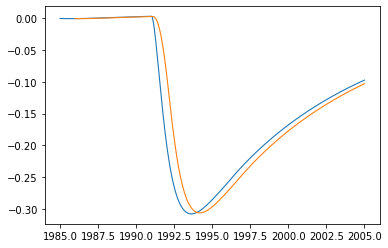

In [206]:
#plt.plot(Vars.Lat,Volc_CTRL[1][-1])
def moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return buffer
plt.plot(Volc_EVA[0]/time_sec_year,Volc_EVA[2]-CTRL_GMT)
plt.plot(Volc_EVA[0]/time_sec_year,moving_average(Volc_EVA[2]-CTRL_GMT,36))

(-0.4, 0.2)

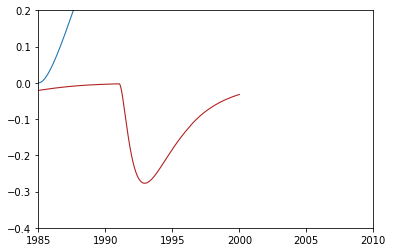

In [208]:
Year_volc, CWL_GMT,  EVA_GMT, CWLcorr_GMT=np.genfromtxt('Data/Volc_800_2000.txt',skip_header=1,unpack=True)
plt.plot(Year_volc, EVA_GMT,c='firebrick',label='EVA 0DEBM')
plt.plot(Volc_EVA[0]/time_sec_year,Volc_EVA[2]-CTRL_GMT)#moving_average(Volc_EVA[2]-CTRL_GMT,1))
#plt.plot(Volc_EVA[0]/time_sec_year,Volc_EVA[1][:,4]-Volc_EVA[1][0,4])
plt.xlim(1985,2010)
plt.ylim(-0.4,0.2)